In [1]:
!pip install memory_profiler

In [1]:
%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [29]:
import os

from memory_profiler import profile, memory_usage
from torch.utils.data import DataLoader
from tqdm import tqdm

from scripts.load_audio_v2 import  AudioFeatureDataset
from scripts.load_text import TextDataset
from scripts.load_video import VideoDataset

In [27]:
# path_how2 = "/Volumes/LaCie/vision/data/" # Jeremy
path_how2 = "/Volumes/T7/data/" # Romain

video_path = os.path.join(path_how2, "resnext101-action-avgpool-300h", "train.npy")
texts_path = os.path.join(path_how2,"how2-300h-v1/data/train", "text.en")
embeddings_path = os.path.join(path_how2, "how2-release/word_embedding/","cmu_partition.train.vec")

In [5]:
%memit video_dataset = VideoDataset(video_path)

peak memory: 1577.71 MiB, increment: 1444.89 MiB


In [30]:
%memit audio_dataset = AudioFeatureDataset(path_how2,"train")

184949it [01:51, 1661.18it/s]


peak memory: 7728.72 MiB, increment: 7473.73 MiB


In [31]:
import psutil; print(psutil.virtual_memory().percent);

82.6


In [7]:
%memit text_dataset = TextDataset(texts_path, embeddings_path)

/Users/romainegele/Documents/lX/2020-2021/s1/INF634-Computer-Vision/project/majore/notebooks/scripts/load_text.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return  np.array(text), np.array(splitted), largest_split


peak memory: 3274.32 MiB, increment: 1627.97 MiB


In [6]:
def iter_over_dataloader(dataset, batch_size=10, num_workers=0):
    SHUFFLE = True
    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=SHUFFLE, num_workers=num_workers)
    for batch in tqdm(dataloader):
        continue

In [13]:
iter_over_dataloader(video_dataset, batch_size=10, num_workers=0)

100%|██████████| 18495/18495 [00:01<00:00, 11894.14it/s]


In [ ]:
iter_over_dataloader(audio_dataset, batch_size=10, num_workers=2)

  0%|          | 0/18495 [00:00<?, ?it/s]

100%|██████████| 18495/18495 [00:05<00:00, 3347.14it/s]


<IPython.core.display.Javascript object>


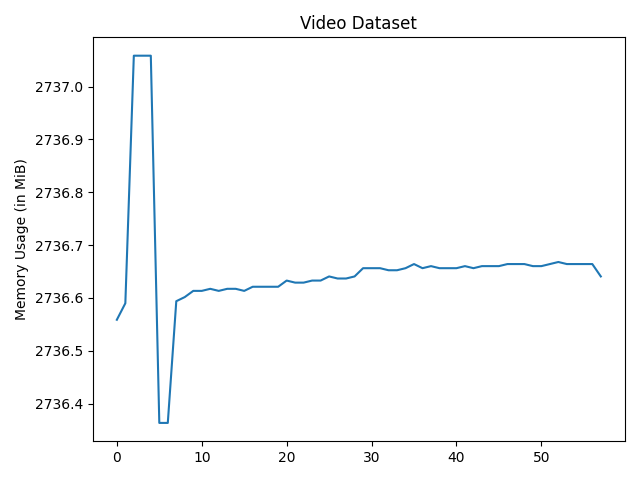

In [9]:
mem_u = memory_usage((iter_over_dataloader, (video_dataset, 10)))

plt.figure()
plt.title("Video Dataset")
plt.plot(mem_u)
plt.ylabel("Memory Usage (in MiB)")
plt.tight_layout()
plt.show()

In [10]:
mem_u = memory_usage((iter_over_dataloader, (audio_dataset, 10)))

plt.figure()
plt.title("Audio Dataset")
plt.plot(mem_u)
plt.ylabel("Memory Usage (in MiB)")
plt.tight_layout()
plt.show()

  0%|          | 0/18495 [01:34<?, ?it/s]Process MemTimer-4:
Traceback (most recent call last):
  File "/Users/romainegele/opt/anaconda3/envs/vision37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/romainegele/opt/anaconda3/envs/vision37/lib/python3.7/site-packages/memory_profiler.py", line 225, in run
    stop = self.pipe.poll(self.interval)
  File "/Users/romainegele/opt/anaconda3/envs/vision37/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/Users/romainegele/opt/anaconda3/envs/vision37/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/Users/romainegele/opt/anaconda3/envs/vision37/lib/python3.7/multiprocessing/connection.py", line 921, in wait
    ready = selector.select(timeout)
  File "/Users/romainegele/opt/anaconda3/envs/vision37/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeo

KeyboardInterrupt: 

100%|██████████| 18495/18495 [00:31<00:00, 580.57it/s]


<IPython.core.display.Javascript object>


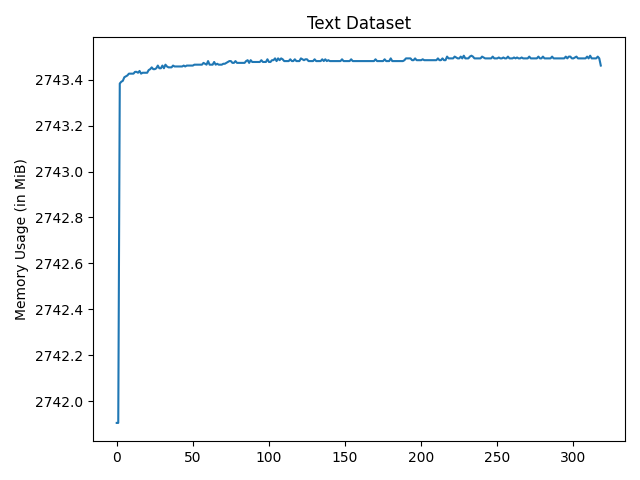

In [11]:
mem_u = memory_usage((iter_over_dataloader, (text_dataset, 10)))

plt.figure()
plt.title("Text Dataset")
plt.plot(mem_u)
plt.ylabel("Memory Usage (in MiB)")
plt.tight_layout()
plt.show()

In [24]:
def load_kaldi_dataset():
    from kaldiio import ReadHelper

    segments_path = os.path.join(path_how2, "how2-300h-v1", "data", "train", "segments")
    scp_path = os.path.join(path_how2, "how2-300h-v1", "data", "train", "feats.scp")
    
    with ReadHelper(f"scp:{scp_path}") as reader:
        for key, numpy_array in tqdm(reader):
            continue

184949it [01:15, 2461.26it/s]


<IPython.core.display.Javascript object>


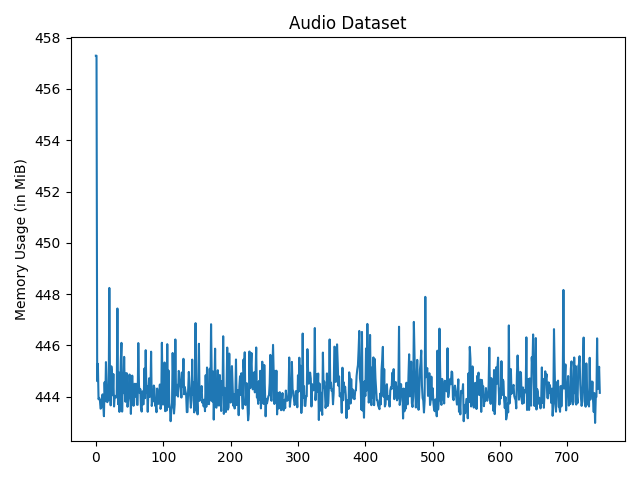

In [25]:
mem_u = memory_usage((load_kaldi_dataset,))

plt.figure()
plt.title("Audio Dataset")
plt.plot(mem_u)
plt.ylabel("Memory Usage (in MiB)")
plt.tight_layout()
plt.show()

In [26]:
def load_kaldi_dataset():
    from kaldiio import ReadHelper

    segments_path = os.path.join(path_how2, "how2-300h-v1", "data", "train", "segments")
    scp_path = os.path.join(path_how2, "how2-300h-v1", "data", "train", "feats.scp")
    
    l = []
    with ReadHelper(f"scp:{scp_path}") as reader:
        for key, numpy_array in tqdm(reader):
            l.append(numpy_array)

184949it [01:31, 2019.00it/s]


<IPython.core.display.Javascript object>


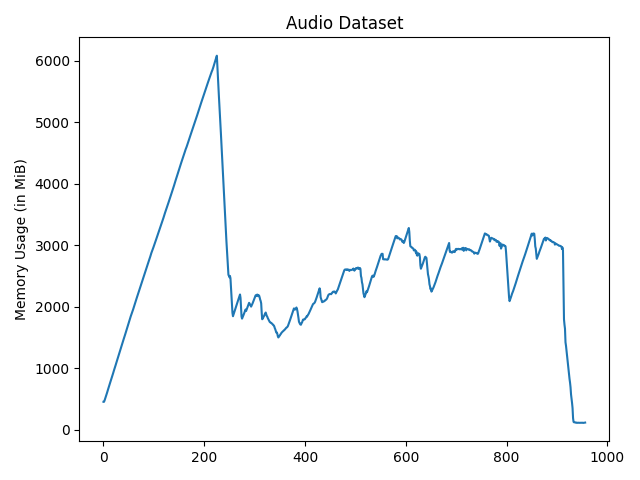

In [27]:
mem_u = memory_usage((load_kaldi_dataset,))

plt.figure()
plt.title("Audio Dataset")
plt.plot(mem_u)
plt.ylabel("Memory Usage (in MiB)")
plt.tight_layout()
plt.show()

In [36]:
for x in tqdm(audio_dataset):
    continue

100%|██████████| 184949/184949 [02:30<00:00, 1229.95it/s]


In [37]:
audio_loader = DataLoader(
        audio_dataset, batch_size=10, shuffle=True, num_workers=0)
for x in tqdm(audio_loader):
    continue

 38%|███▊      | 7074/18495 [02:22<03:49, 49.81it/s]


KeyboardInterrupt: 

In [8]:
import psutil; print(psutil.virtual_memory().percent);

84.1

In [41]:
seq_len = [x.shape[0] for x in audio_dataset]

<IPython.core.display.Javascript object>


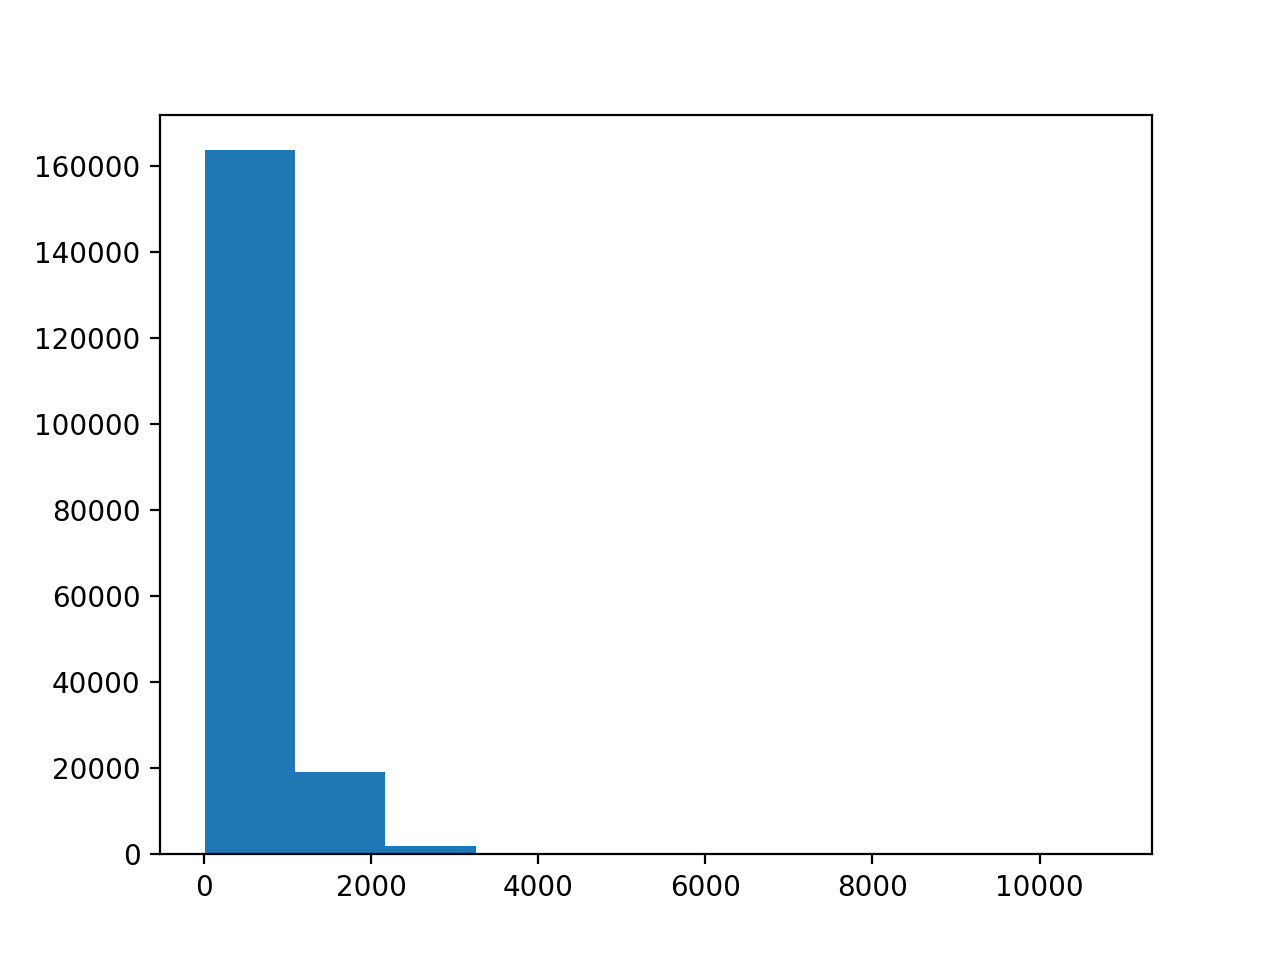

(array([1.63625e+05, 1.90990e+04, 1.87000e+03, 2.59000e+02, 6.50000e+01,
        1.40000e+01, 1.00000e+01, 4.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([8.0000e+00, 1.0879e+03, 2.1678e+03, 3.2477e+03, 4.3276e+03,
        5.4075e+03, 6.4874e+03, 7.5673e+03, 8.6472e+03, 9.7271e+03,
        1.0807e+04]),
 <BarContainer object of 10 artists>)

In [42]:
plt.hist(seq_len)

In [45]:
import numpy as np
np.quantile(seq_len, 0.98)

1895.0400000000081